# Megatutorial 2: Clustering

In [71]:
from pandas import read_csv

In [72]:
data = read_csv("../data/fake_profiles.csv")

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     576 non-null    int64  
 1   profile_pic                    576 non-null    object 
 2   rel_num_numeric_char_username  576 non-null    float64
 3   words_fullname                 576 non-null    int64  
 4   rel_num_numeric_char_fullname  576 non-null    float64
 5   name=username                  576 non-null    object 
 6   description_length             576 non-null    int64  
 7   has_external_url               576 non-null    object 
 8   is_private                     576 non-null    object 
 9   num_posts                      576 non-null    int64  
 10  num_followers                  556 non-null    float64
 11  num_follows                    576 non-null    int64  
 12  is_fake                        576 non-null    obj

In [74]:
data.columns

Index(['Unnamed: 0', 'profile_pic', 'rel_num_numeric_char_username',
       'words_fullname', 'rel_num_numeric_char_fullname', 'name=username',
       'description_length', 'has_external_url', 'is_private', 'num_posts',
       'num_followers', 'num_follows', 'is_fake'],
      dtype='object')

In [75]:
data.values

array([[0, 'yes', 0.27, ..., 1000.0, 955, 'no'],
       [1, 'yes', 0.0, ..., 2740.0, 533, 'no'],
       [2, 'yes', 0.1, ..., 159.0, 98, 'no'],
       ...,
       [573, 'yes', 0.57, ..., 96.0, 339, 'yes'],
       [574, 'yes', 0.57, ..., 57.0, 73, 'yes'],
       [575, 'yes', 0.27, ..., 150.0, 487, 'yes']],
      shape=(576, 13), dtype=object)

In [76]:
target = ["is_fake"]

features= [
    'rel_num_numeric_char_username', 
    'words_fullname', 
    'rel_num_numeric_char_fullname', 
    'description_length' 
    ]


In [77]:
y = data[target]
X = data[features]

# Clustering in Scikit-Learn

In [78]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [79]:
# zwei cluster weil fake und nicht fake
kmeans_engine = KMeans(n_clusters=2)

kmeans_engine.fit(X)
clusters = kmeans_engine.predict(X)

/workspaces/data-science-ue/.venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='description_length', ylabel='words_fullname'>

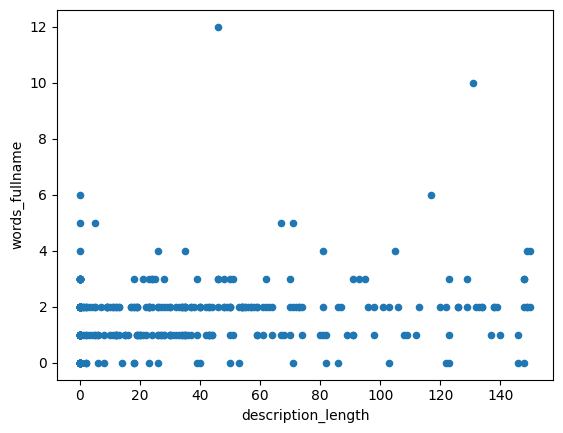

In [ ]:
X.plot(
    kind="scatter", 
    x="description_length", 
    y="words_fullname", 
    c="cluster", 
    cmap="inferno"
    )

In [82]:
hierarchical_engine = AgglomerativeClustering(n_clusters=2)

hierarchical_engine.fit_predict(X)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Clustering in Scipy

In [87]:
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

In [88]:
Z = hierarchy.linkage(X, method="ward")

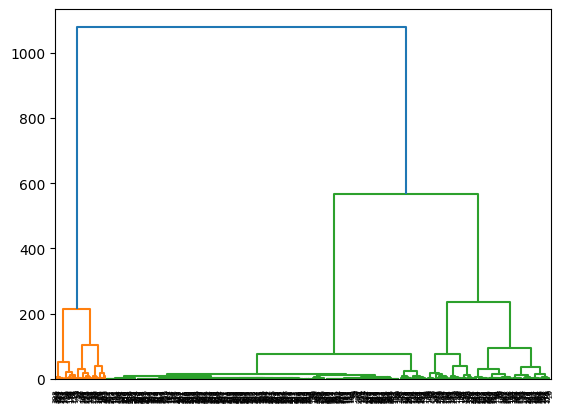

In [89]:
hierarchy.dendrogram(Z)
plt.show()